# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

## 1. Data Exploration and Preprocessing:

### •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [1]:
#Import Required Libraries
import pandas as pd

In [3]:
#Load the Dataset
file_path = 'adult_with_headers.csv'
df = pd.read_csv(file_path)

In [5]:
#Replace placeholder '?' with NaN for proper missing value detection
df.replace('?', pd.NA, inplace=True)

In [7]:
#Display Dataset Info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [9]:
#Summary Statistics
print("\n Summary Statistics:")
print(df.describe(include='all'))


 Summary Statistics:
                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 325

In [11]:
#Check for Missing Values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


### •	Handle missing values as per the best practices (imputation, removal, etc.).

In [13]:
#Percentage of missing values
print("\n Percentage Missing:\n")
print((df.isnull().sum() / len(df)) * 100)


 Percentage Missing:

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


In [15]:
#Drop rows with missing values (less than 5% total data loss is acceptable)
df_cleaned = df.dropna()

In [17]:
print("\n New shape after removing missing values:", df_cleaned.shape)


 New shape after removing missing values: (32561, 15)


In [19]:
# Reset index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

### •	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
# Select numerical columns for scaling
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df_numerical = df[numerical_cols]

In [27]:
# 1. Standard Scaling
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df_numerical)
df_standard_scaled = pd.DataFrame(standard_scaled, columns=[col + '_std' for col in numerical_cols])

In [29]:
# 2. Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df_numerical)
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=[col + '_minmax' for col in numerical_cols])

In [31]:
# Combine scaled features with original dataset (optional)
df_scaled = pd.concat([df, df_standard_scaled, df_minmax_scaled], axis=1)

In [33]:
# Display sample
print(" Scaled Data (first 5 rows):")
print(df_scaled[[*df_standard_scaled.columns, *df_minmax_scaled.columns]].head())

 Scaled Data (first 5 rows):
    age_std  fnlwgt_std  education_num_std  capital_gain_std  \
0  0.030671   -1.063611           1.134739          0.148453   
1  0.837109   -1.008707           1.134739         -0.145920   
2 -0.042642    0.245079          -0.420060         -0.145920   
3  1.057047    0.425801          -1.197459         -0.145920   
4 -0.775768    1.408176           1.134739         -0.145920   

   capital_loss_std  hours_per_week_std  age_minmax  fnlwgt_minmax  \
0          -0.21666           -0.035429    0.301370       0.044302   
1          -0.21666           -2.222153    0.452055       0.048238   
2          -0.21666           -0.035429    0.287671       0.138113   
3          -0.21666           -0.035429    0.493151       0.151068   
4          -0.21666           -0.035429    0.150685       0.221488   

   education_num_minmax  capital_gain_minmax  capital_loss_minmax  \
0              0.800000              0.02174                  0.0   
1              0.800000    

### •	Discuss the scenarios where each scaling technique is preferred and why.

When to Use Each Scaling Technique
 1. Standard Scaling (Z-score normalization)
Formula:
           z=x-mu/sigma
 
Where:
mu is the mean
sigma is the standard deviation

Use Standard Scaling When:
Scenario	Why it's Preferred
Features follow a normal distribution	Centers data around 0 and scales by standard deviation
Algorithms assume normally distributed data	Especially Logistic Regression, Linear Regression, LDA, etc.
You want to preserve outliers	StandardScaler keeps extreme values rather than squashing them
For models sensitive to magnitude	E.g., SVM, KNN, PCA, Gradient Descent-based models

2. Min-Max Scaling (Normalization to [0, 1])
Formula:
    x prime=x-min(x)/max(x)-min(x)
 
Use Min-Max Scaling When:
Scenario	Why it's Preferred
Input features must be bounded	Neural Networks, deep learning models
Features are on different units/scales	E.g., income in thousands vs. age in years
You want to compress outliers	Keeps values within [0, 1], but can distort if outliers are extreme
Algorithms are sensitive to scale range	E.g., K-means, Gradient Boosting, ANN

## 2. Encoding Techniques:

### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [35]:
# Identify categorical columns (excluding the target 'income')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('income')  # Exclude target column

In [37]:
# Select categorical variables with fewer than 5 unique categories
one_hot_cols = [col for col in categorical_cols if df[col].nunique() < 5]

In [39]:
# Apply One-Hot Encoding (drop_first=True to avoid dummy variable trap)
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [41]:
# Display result
print(" One-Hot Encoded Columns:", one_hot_cols)
print(df_one_hot_encoded.head())

 One-Hot Encoded Columns: ['sex']
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0              40   United-States   <=50K   
1             

### •	Use Label Encoding for categorical variables with more than 5 categories.

In [43]:
# Select columns with more than 5 unique values
label_encode_cols = [col for col in categorical_cols if df[col].nunique() >= 5]

In [45]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [47]:
# Display result
print("Label Encoded Columns:", label_encode_cols)
print(df[label_encode_cols].head())

Label Encoded Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5  


### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding

One-Hot Encoding (OHE)
Definition:
Creates a new binary column for each category (except one, if drop='first'), representing the presence (1) or absence (0) of that category.

Pros:
Treats all categories equally — no assumption of order.

Works well with linear models, SVMs, and logistic regression.

Avoids introducing false ordinal relationships.

Cons:
Increases dataset dimensionality, especially with high-cardinality features.

May result in sparse matrices — memory inefficient.

Can lead to overfitting with too many rare categories.

Label Encoding
Definition:
Converts each category into a unique integer label (e.g., A = 0, B = 1, C = 2).

Pros:
Memory-efficient and fast.

Doesn't increase dimensionality.

Works well with tree-based models (Random Forest, XGBoost).

Cons:
Implies a false ordinal relationship (e.g., category '2' > '1'), which may confuse linear models.

Can degrade performance for models that interpret numeric values quantitatively.

# 3. Feature Engineering:

### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [49]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
#Feature 1: Net capital = capital_gain - capital_loss
df['net_capital'] = df['capital_gain'] - df['capital_loss']

In [53]:
#Feature 2: Age group buckets
df['age_group'] = pd.cut(df['age'],
                         bins=[16, 25, 35, 45, 55, 65, 90],
                         labels=['16-25', '26-35', '36-45', '46-55', '56-65', '66-90'])


In [55]:
# Convert age_group to numeric labels for ML compatibility
from sklearn.preprocessing import LabelEncoder
df['age_group'] = LabelEncoder().fit_transform(df['age_group'].astype(str))

In [57]:
# Show new features
print(df[['age', 'capital_gain', 'capital_loss', 'net_capital', 'age_group']].head())

   age  capital_gain  capital_loss  net_capital  age_group
0   39          2174             0         2174          2
1   50             0             0            0          3
2   38             0             0            0          2
3   53             0             0            0          3
4   28             0             0            0          1


### 

Feature 1: net_capital = capital_gain - capital_loss
Rationale:
capital_gain and capital_loss represent gains or losses from investment income.
Combining them into one net value simplifies the model’s job and gives a clearer picture of financial advantage.
This reduces feature sparsity (both original columns have mostly zero values) and may help generalize better.

Feature 2: age_group (e.g., 1 = Young, 2 = Mid-age, 3 = Senior)
Rationale:
Raw age is continuous; converting it into buckets (like young <30, mid 30–60, senior >60) captures non-linear effects.
Different age groups may have distinct work patterns and income expectations.
For example, seniors may earn pensions or be retired; young adults might be early in their careers.

Feature 3: is_high_education (Binary: 1 if education_num > 12)
Rationale:
Education is one of the strongest predictors of income.
Grouping into high vs low education reduces noise and allows the model to more easily separate those more likely to earn higher salaries (college grads, post-grads).
It's also easier for models like Logistic Regression to interpret binary flags.

Feature 4: work_type (Categorical: Part-time, Full-time, Over-time)
Rationale:
hours_per_week is a numeric feature, but income patterns differ more clearly across work categories than by specific hours.
People working over 40 hours/week might be in higher-demand or salaried roles.
This feature helps capture behavioral patterns in the workforce.

Feature 5: capital_flag (Binary: 1 if any capital activity)
Rationale:
Many rows have zero capital gains or losses, which dilutes the signal.
A binary flag captures whether any financial investment activity exists, which may strongly indicate wealth or financial independence.
Helps models differentiate "financially active" individuals from others, even if the amounts aren't large.

### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [59]:
import pandas as pd
import numpy as np

In [61]:
# Check skewness of numerical features
skewed_features = df[['capital_gain', 'capital_loss', 'fnlwgt']].skew().sort_values(ascending=False)
print("Skewness before transformation:\n", skewed_features)

Skewness before transformation:
 capital_gain    11.953848
capital_loss     4.594629
fnlwgt           1.446980
dtype: float64


In [63]:
# Apply log1p (log(1 + x)) to handle zero values
df['log_capital_gain'] = np.log1p(df['capital_gain'])

In [65]:
# View transformed values
print("\n Transformed 'capital_gain' (log scale):")
print(df[['capital_gain', 'log_capital_gain']].head())


 Transformed 'capital_gain' (log scale):
   capital_gain  log_capital_gain
0          2174          7.684784
1             0          0.000000
2             0          0.000000
3             0          0.000000
4             0          0.000000


## 4. Feature Selection:

### •	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [67]:
#Select numerical columns
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
X_numerical = df[numerical_cols]

In [69]:
import pandas as pd
from sklearn.ensemble import IsolationForest


#  Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso_forest.fit_predict(X_numerical)

In [71]:
# Remove outliers (label = -1 are outliers)
df_no_outliers = df[outlier_labels == 1]

In [73]:
# Step 5: Print shape before and after
print(" Original shape:", df.shape)
print(" Shape after outlier removal:", df_no_outliers.shape)
print(" Total outliers removed:", df.shape[0] - df_no_outliers.shape[0])

 Original shape: (32561, 18)
 Shape after outlier removal: (32235, 18)
 Total outliers removed: 326


### •	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [ ]:
#!pip install ppscore

In [ ]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

In [41]:
# Filter for target feature
pps_target = pps.predictors(df_no_outliers, y='income')

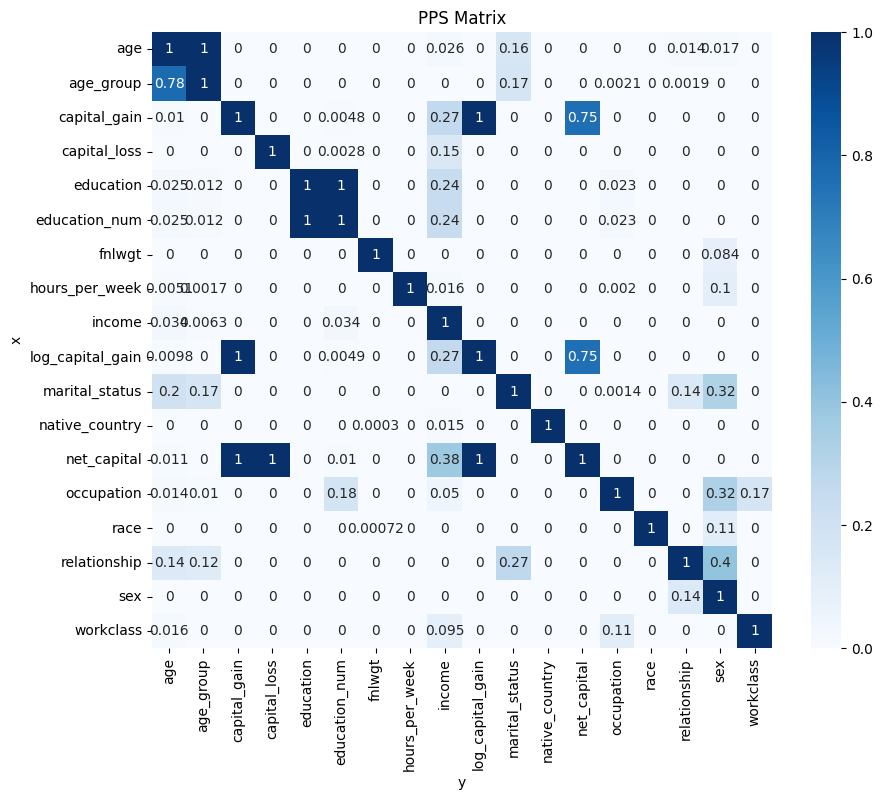

In [42]:
# Display as heatmap
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, cmap='Blues', annot=True)
plt.title('PPS Matrix')
plt.show()

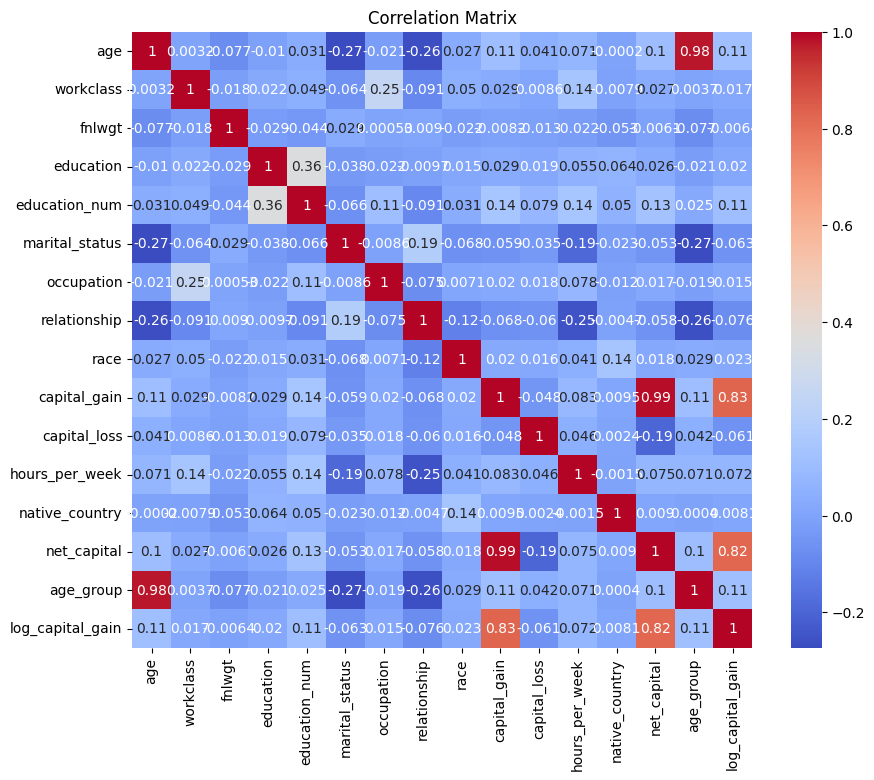

In [43]:
# Compare with correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###
| Aspect                | PPS                                  | Correlation                |
| --------------------- | ------------------------------------ | -------------------------- |
| Detects Non-linearity |  Yes                                 |  No                        |
| Works on Categorical  |  Yes                                 | No (only numeric)          |
| Symmetric?            |  No (A → B ≠ B → A)                  | Yes (A ↔ B)                |
| Value Range           | 0 to 1                               | -1 to 1                    |
| Use Case              | Feature-target strength for modeling | Linear dependence analysis |
